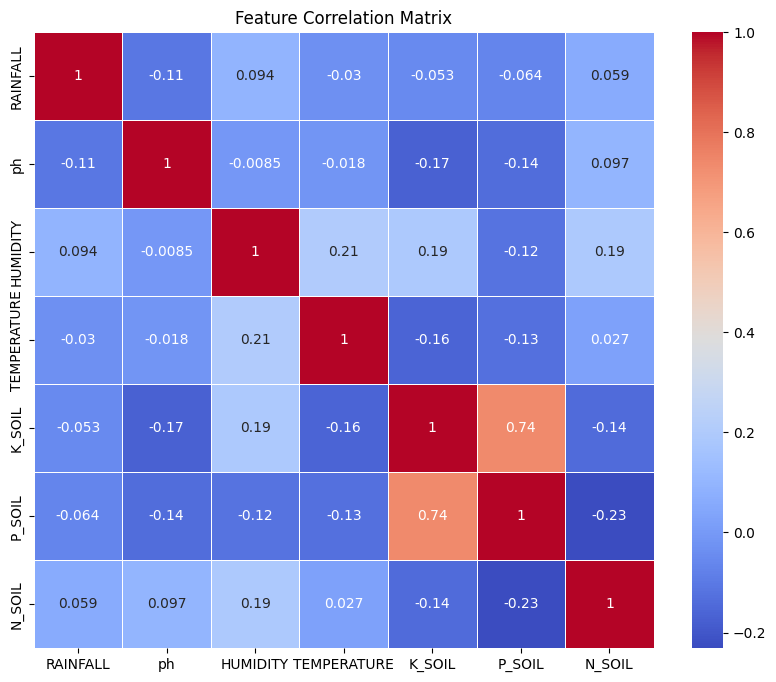

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1024      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9345 (36.50 KB)
Trainable params: 9345 (36.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
14/14 [==============================] - 0s 2ms/step


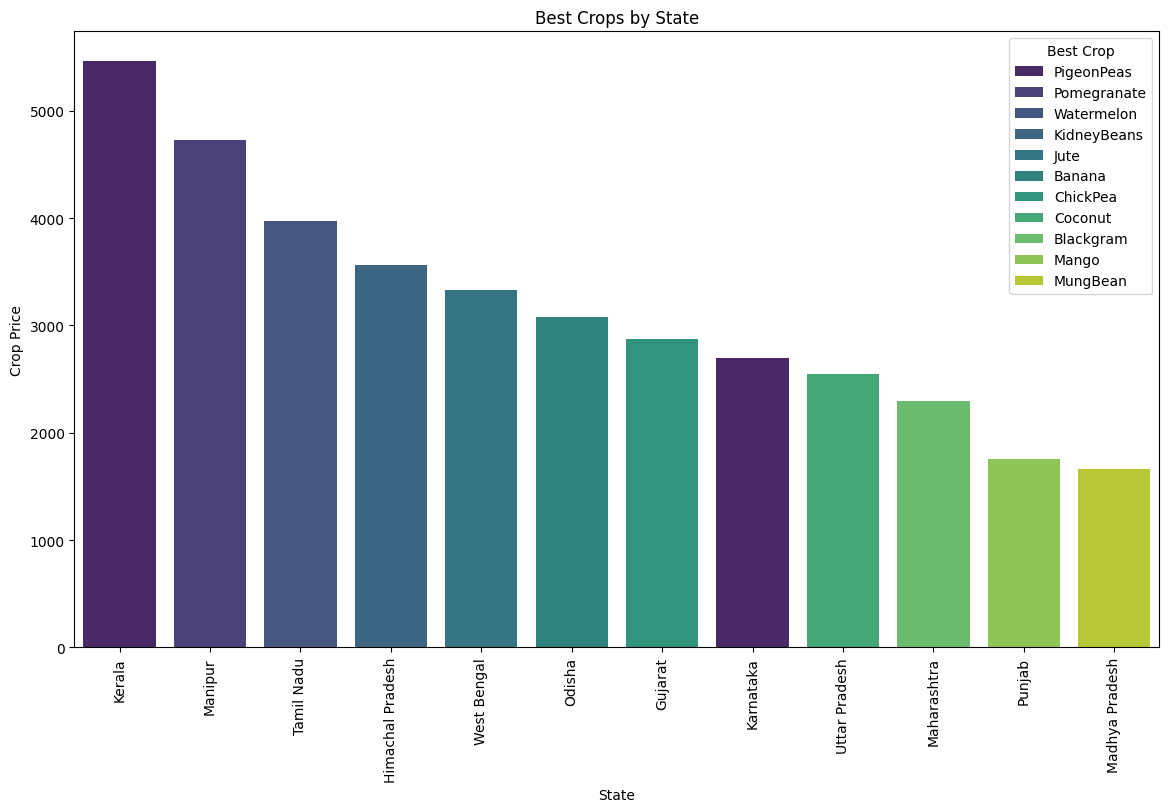

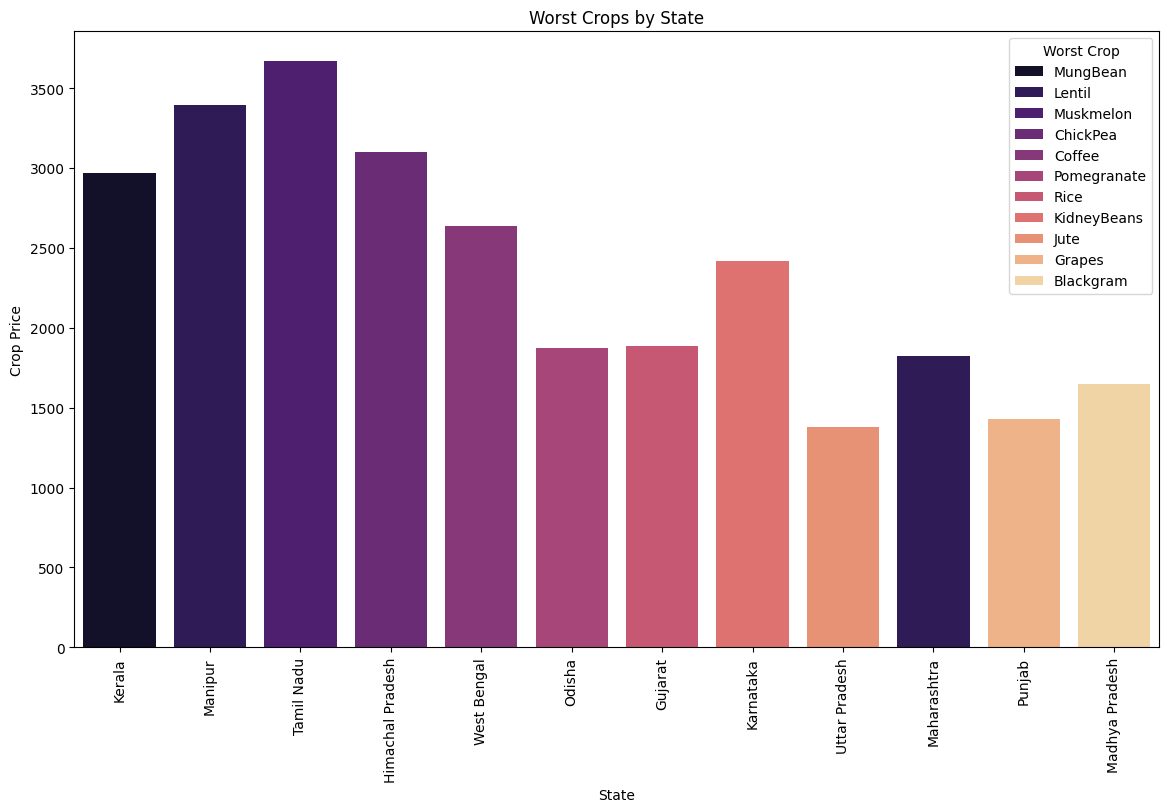

<ipython-input-2-2283cdc3e2f2>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='STATE', y=nutrient, data=dataset, ax=axes[i], palette='Set3')
<ipython-input-2-2283cdc3e2f2>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='STATE', y=nutrient, data=dataset, ax=axes[i], palette='Set3')
<ipython-input-2-2283cdc3e2f2>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='STATE', y=nutrient, data=dataset, ax=axes[i], palette='Set3')
<ipython-input-2-2283cdc3e2f2>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

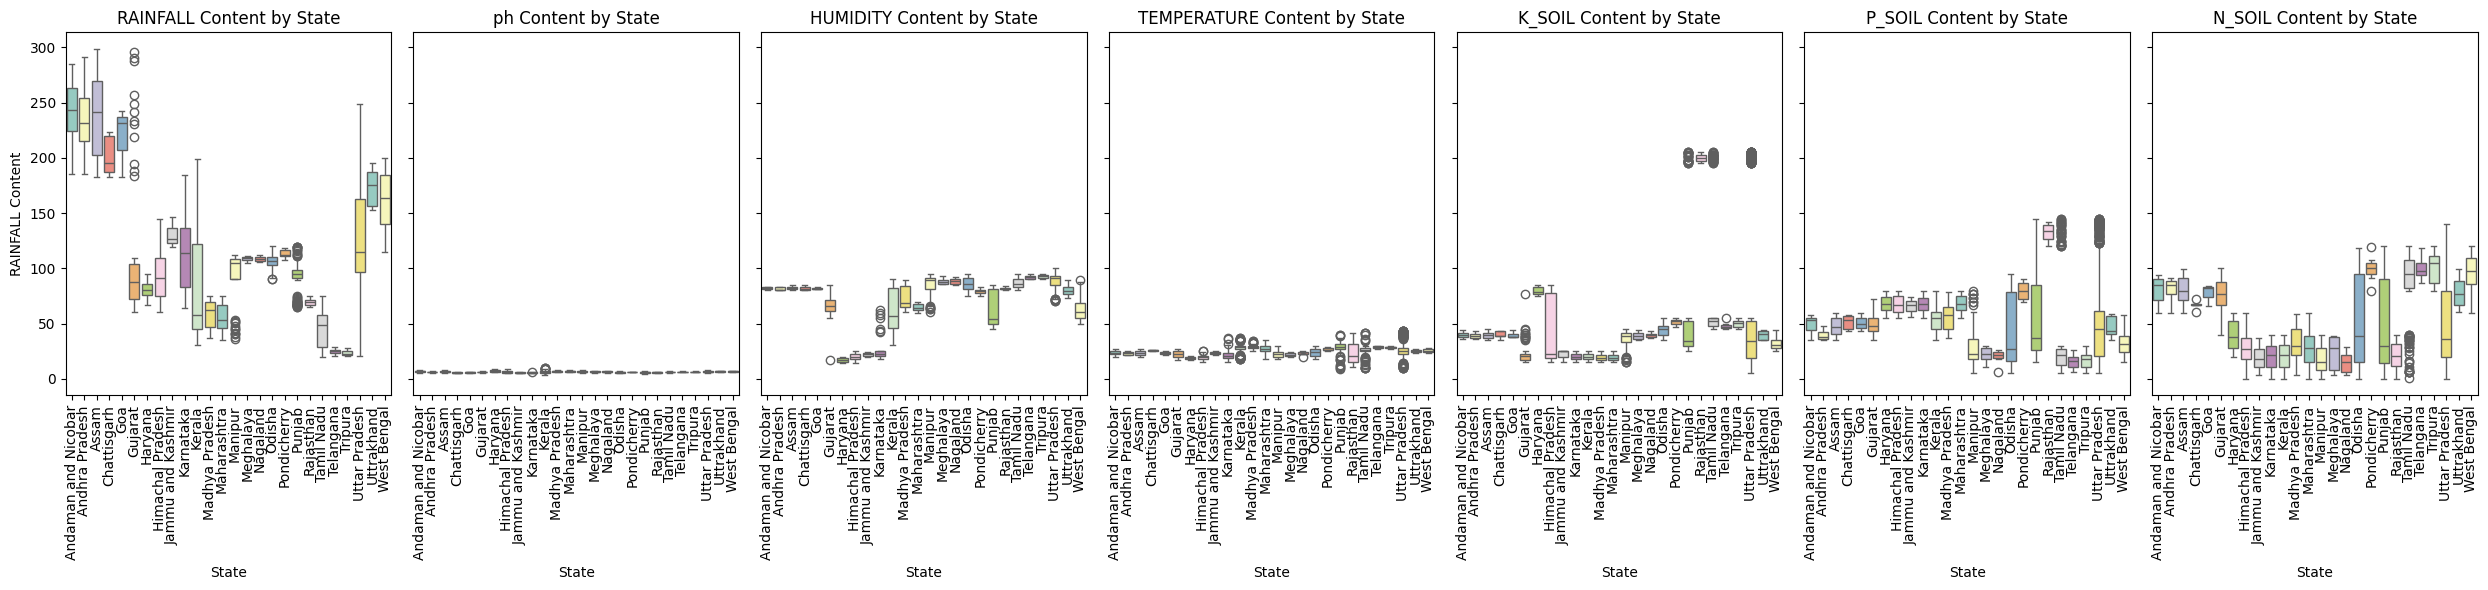

Best and Worst Crops for Each State:
    index             STATE    CROP_best  CROP_PRICE_best   CROP_worst  \
0       3            Kerala   PigeonPeas      5466.129032     MungBean   
1       4           Manipur  Pomegranate      4723.717949       Lentil   
2       5        Tamil Nadu   Watermelon      3969.280000    Muskmelon   
3       7  Himachal Pradesh  KidneyBeans      3565.000000     ChickPea   
4       9       West Bengal         Jute      3325.416667       Coffee   
5      10            Odisha       Banana      3078.108108  Pomegranate   
6      11           Gujarat     ChickPea      2875.000000         Rice   
7      14         Karnataka   PigeonPeas      2695.285714  KidneyBeans   
8      16     Uttar Pradesh      Coconut      2550.840000         Jute   
9      18       Maharashtra    Blackgram      2291.706667       Lentil   
10     21            Punjab        Mango      1750.400000       Grapes   
11     23    Madhya Pradesh     MungBean      1657.894737    Blackgram   



<ipython-input-2-2283cdc3e2f2>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=selected_features, palette='Blues_d')


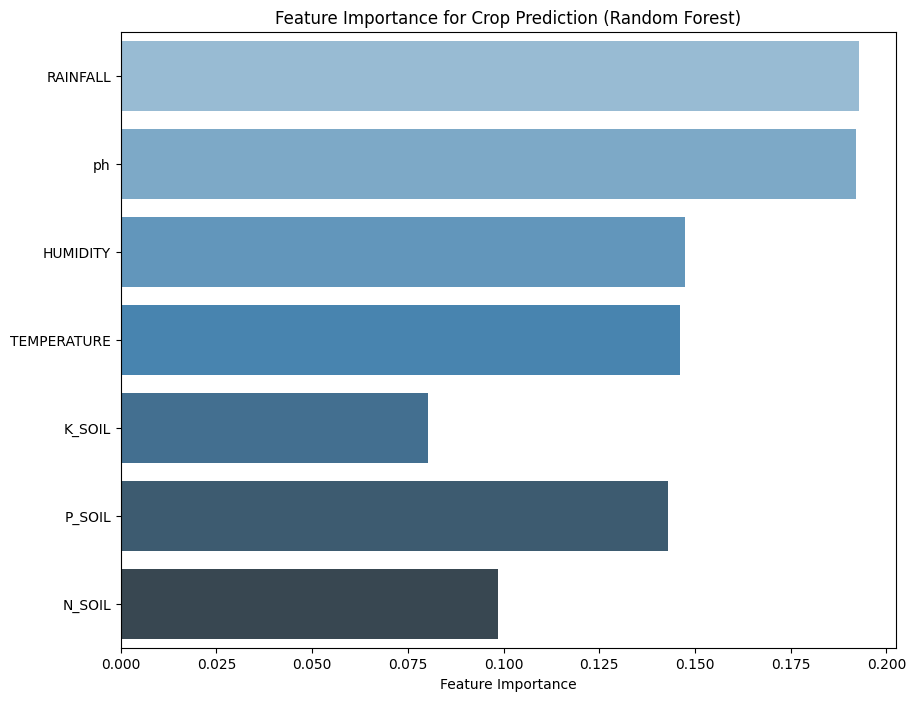

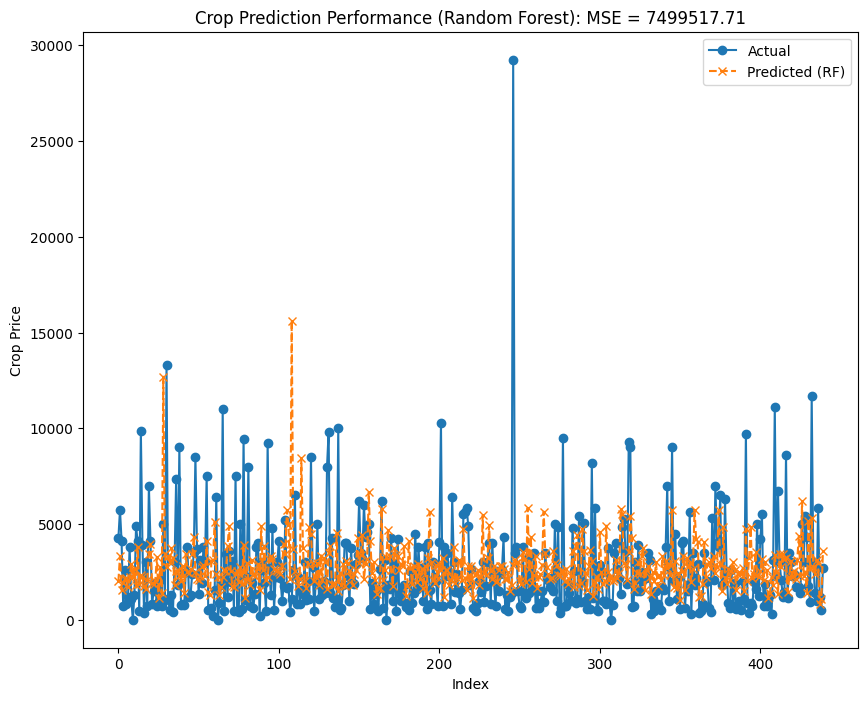

<ipython-input-2-2283cdc3e2f2>:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=selected_features, palette='Greens_d')


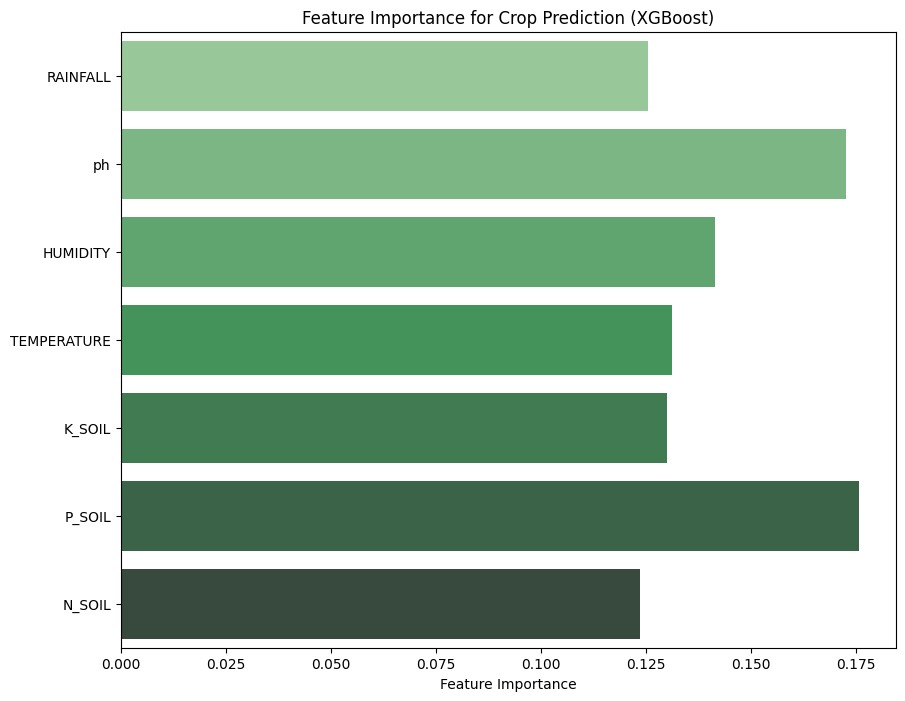

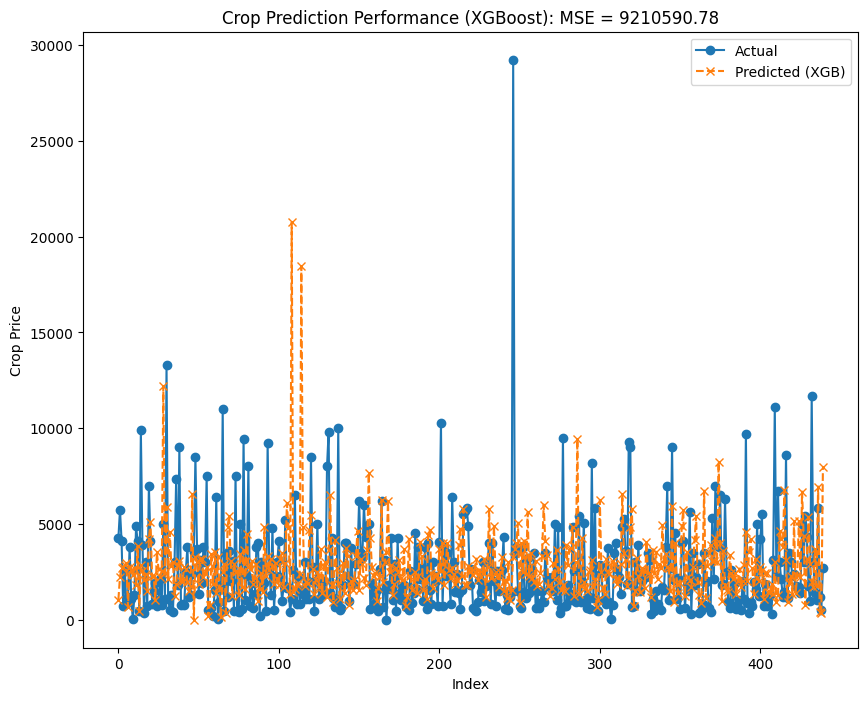

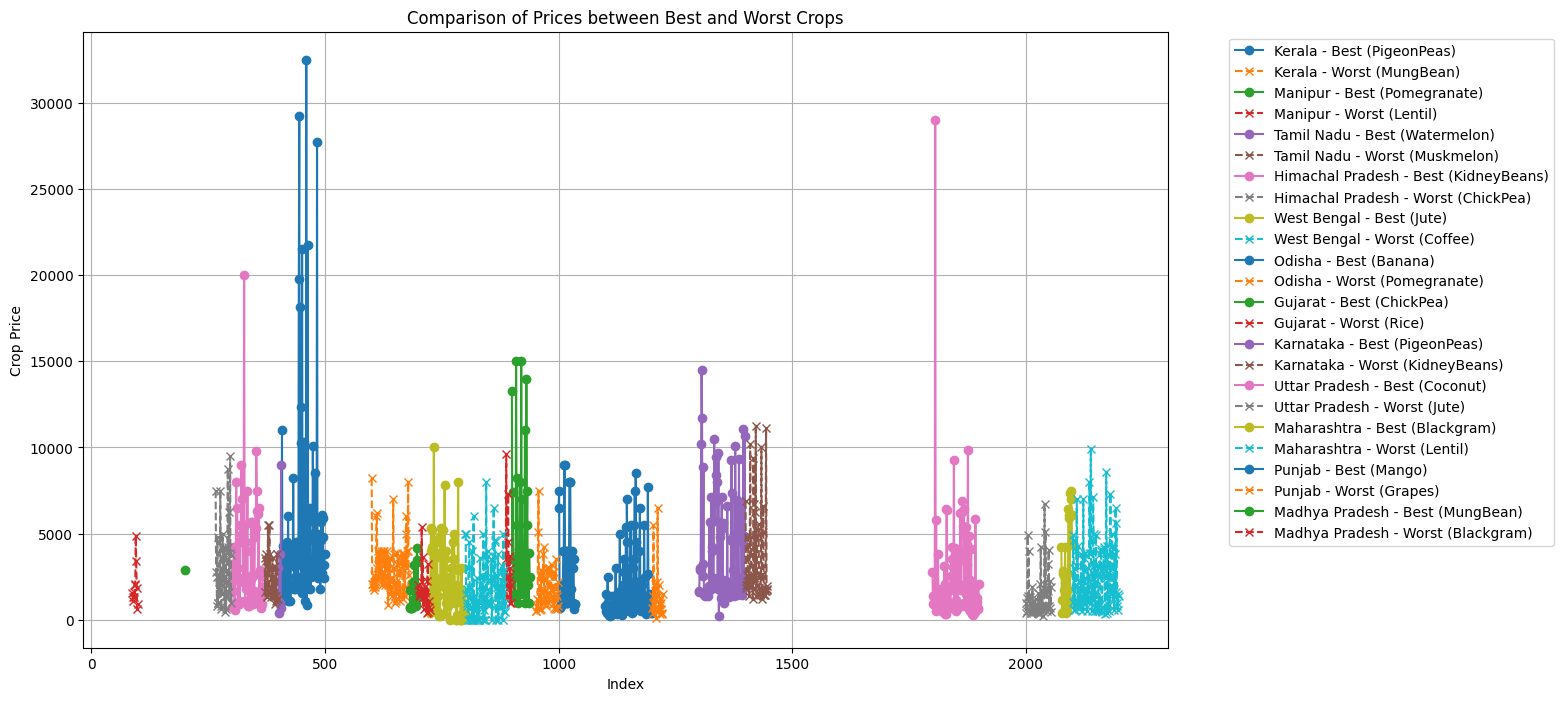

Crop Price Predictions:
      Actual  Predicted (Random Forest)  Predicted (XGBoost)
1451    4255                    2000.26          1035.898560
1334    5740                    3325.87          2237.130859
1761    4100                    1538.45          2709.615723
1735     700                    1925.81          2747.492676
1576    2580                    2133.95          2833.264404
...      ...                        ...                  ...
59      1000                    3125.72          1748.530151
71      5850                    2939.62          6951.267090
1908    1170                     816.10           402.825439
1958     500                    1069.90           339.058228
482     2700                    3591.92          7950.471680

[440 rows x 3 columns]
Best and Worst Crops for Each State:
    index             STATE    CROP_best  CROP_PRICE_best   CROP_worst  \
0       3            Kerala   PigeonPeas      5466.129032     MungBean   
1       4           Manipur  Pomegr

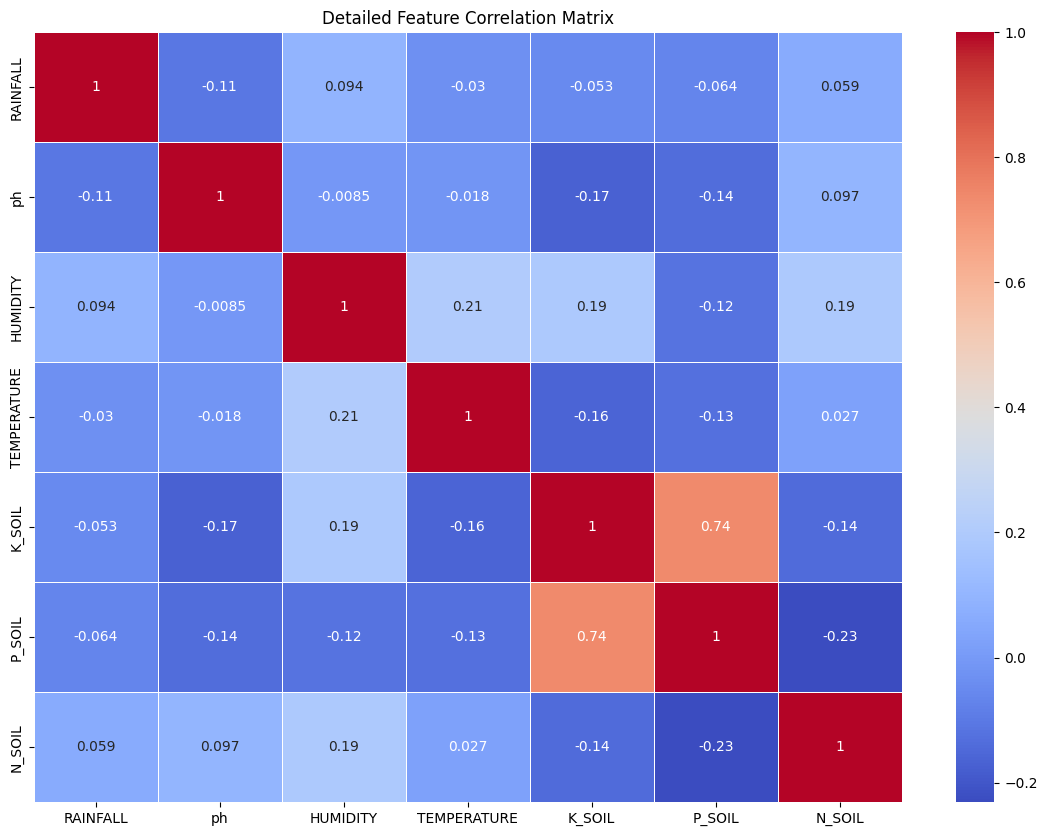

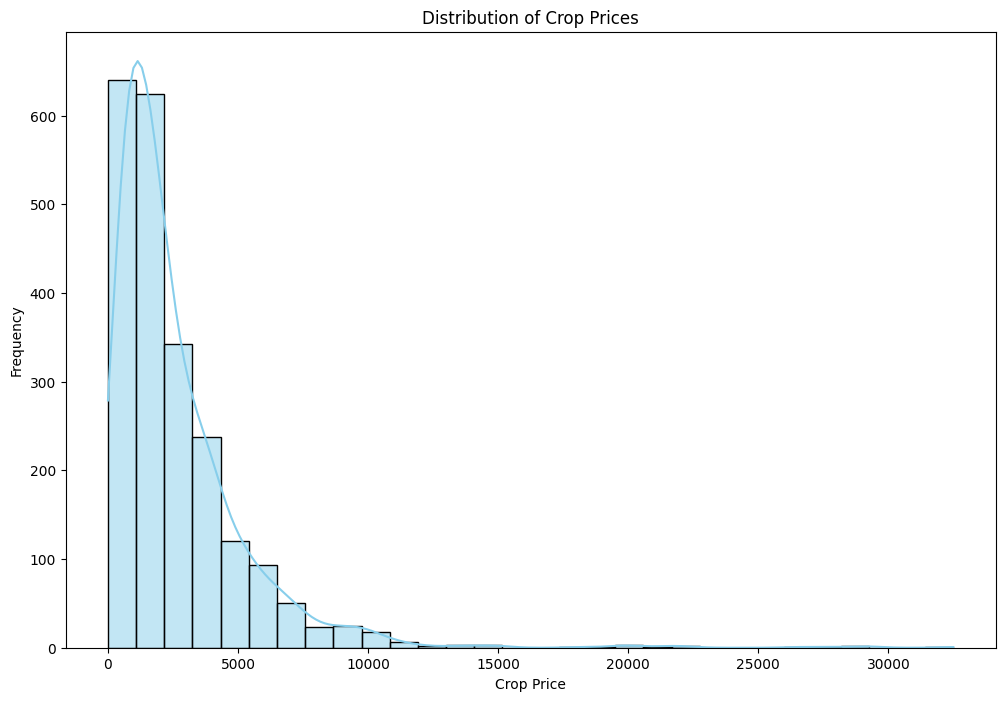

<ipython-input-2-2283cdc3e2f2>:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_crop_price_by_state.index, y=avg_crop_price_by_state.values, palette='coolwarm')


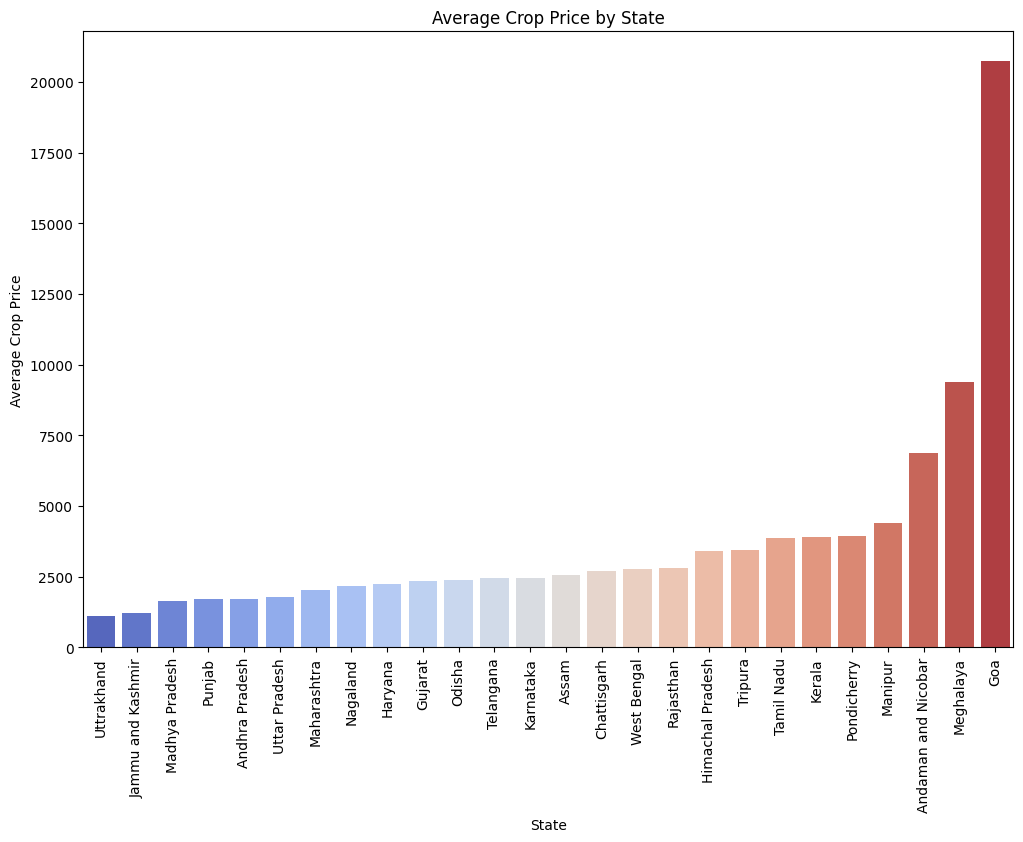

<ipython-input-2-2283cdc3e2f2>:240: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_crop_price_by_crop.index, x=avg_crop_price_by_crop.values, palette='viridis')


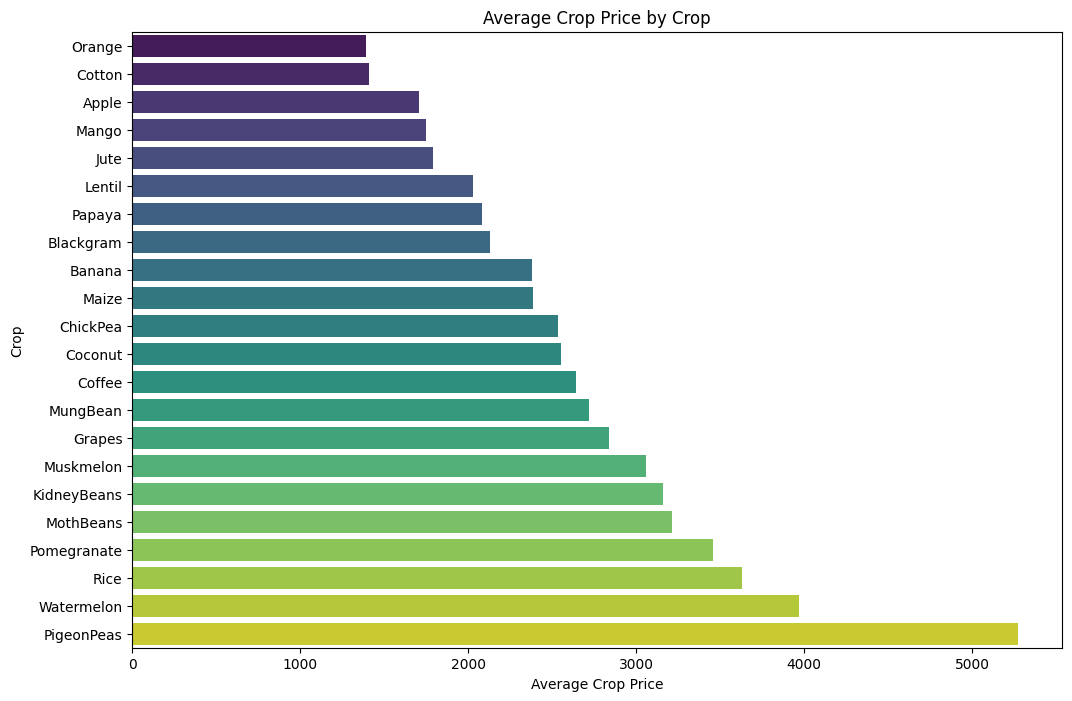

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Load the dataset
url = "https://raw.githubusercontent.com/saptarshihalder/Crop-prediction-model/main/indiancrop_dataset.csv"
column_names = ['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'STATE', 'CROP_PRICE', 'CROP']
dataset = pd.read_csv(url, delimiter=',', skiprows=1, names=column_names)

# Encoding categorical variables
dataset_encoded = pd.get_dummies(dataset, columns=['STATE', 'CROP'], drop_first=True)

# Handling missing values (if any)
dataset_encoded.dropna(inplace=True)

# Splitting features and labels after encoding and handling missing values
features_encoded = dataset_encoded.drop(['CROP_PRICE'], axis=1)
labels_encoded = dataset_encoded['CROP_PRICE']

# Splitting into train and test sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features_encoded, labels_encoded, test_size=0.2, random_state=42)

# Exploratory Data Analysis (EDA) and Visualization
selected_features = ['RAINFALL', 'ph', 'HUMIDITY', 'TEMPERATURE', 'K_SOIL', 'P_SOIL', 'N_SOIL']
numeric_dataset = dataset[selected_features]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Preprocessing
scaler = RobustScaler()
train_features_scaled = scaler.fit_transform(train_features[selected_features])
test_features_scaled = scaler.transform(test_features[selected_features])

# Model building
def build_and_compile_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam())
    return model

input_shape = train_features_scaled.shape[1:]
dnn_model = build_and_compile_model(input_shape)
dnn_model.summary()

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = dnn_model.fit(
    train_features_scaled, train_labels,
    validation_split=0.2,
    epochs=100,
    callbacks=[callback],
    verbose=0
)

test_mae = dnn_model.evaluate(test_features_scaled, test_labels, verbose=0)
test_predictions = dnn_model.predict(test_features_scaled).flatten()
mape = np.mean(np.abs((test_labels - test_predictions) / test_labels)) * 100

# Identifying the best and worst crops for each state
best_worst_crops = dataset.groupby(['STATE', 'CROP']).agg({'CROP_PRICE': 'mean'}).reset_index()

# Ensure that the best and worst crops of the same state are not the same
best_crops = best_worst_crops.sort_values('CROP_PRICE', ascending=False).drop_duplicates('STATE')
worst_crops = best_worst_crops.sort_values('CROP_PRICE').drop_duplicates('STATE')

# Remove duplicates where best and worst crops are the same for a state
best_worst_crops_filtered = best_crops.merge(worst_crops, on='STATE', suffixes=('_best', '_worst'))
best_worst_crops_filtered = best_worst_crops_filtered[
    best_worst_crops_filtered['CROP_best'] != best_worst_crops_filtered['CROP_worst']]

# Plotting the best and worst crops by state
plt.figure(figsize=(14, 8))
sns.barplot(x='STATE', y='CROP_PRICE_best', hue='CROP_best', data=best_worst_crops_filtered, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Crop Price')
plt.title('Best Crops by State')
plt.legend(title='Best Crop', bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='STATE', y='CROP_PRICE_worst', hue='CROP_worst', data=best_worst_crops_filtered, palette='magma')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Crop Price')
plt.title('Worst Crops by State')
plt.legend(title='Worst Crop', bbox_to_anchor=(1, 1))
plt.show()

# Additional visualizations
fig, axes = plt.subplots(1, 7, figsize=(25, 6), sharey=True)
for i, nutrient in enumerate(selected_features):
    sns.boxplot(x='STATE', y=nutrient, data=dataset, ax=axes[i], palette='Set3')
    axes[i].set_title(f'{nutrient} Content by State')
    axes[i].set_xlabel('State')
    axes[i].set_ylabel(f'{nutrient} Content')
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

print("Best and Worst Crops for Each State:")
print(best_worst_crops_filtered.reset_index())

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_features_scaled, train_labels)
cv_scores = cross_val_score(rf_model, train_features_scaled, train_labels, cv=5)
rf_mse = mean_squared_error(test_labels, rf_model.predict(test_features_scaled))

# Feature Importance (Random Forest)
importance = rf_model.feature_importances_
plt.figure(figsize=(10, 8))
sns.barplot(x=importance, y=selected_features, palette='Blues_d')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Crop Prediction (Random Forest)')
plt.show()

# Predictions vs Actuals (Random Forest)
plt.figure(figsize=(10, 8))
plt.plot(test_labels.values, label='Actual', linestyle='-', marker='o')
plt.plot(rf_model.predict(test_features_scaled), label='Predicted (RF)', linestyle='--', marker='x')
plt.xlabel('Index')
plt.ylabel('Crop Price')
plt.title(f'Crop Prediction Performance (Random Forest): MSE = {rf_mse:.2f}')
plt.legend()
plt.show()

# XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(train_features_scaled, train_labels)
cv_scores = cross_val_score(xgb_model, train_features_scaled, train_labels, cv=5)
xgb_mse = mean_squared_error(test_labels, xgb_model.predict(test_features_scaled))

# Feature Importance (XGBoost)
importance = xgb_model.feature_importances_
plt.figure(figsize=(10, 8))
sns.barplot(x=importance, y=selected_features, palette='Greens_d')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Crop Prediction (XGBoost)')
plt.show()

# Predictions vs Actuals (XGBoost)
plt.figure(figsize=(10, 8))
plt.plot(test_labels.values, label='Actual', linestyle='-', marker='o')
plt.plot(xgb_model.predict(test_features_scaled), label='Predicted (XGB)', linestyle='--', marker='x')
plt.xlabel('Index')
plt.ylabel('Crop Price')
plt.title(f'Crop Prediction Performance (XGBoost): MSE = {xgb_mse:.2f}')
plt.legend()
plt.show()

# Comparison of Best and Worst Crops
plt.figure(figsize=(14, 8))
for index, row in best_worst_crops_filtered.reset_index().iterrows():
    state = row['STATE']
    best_crop = row['CROP_best']
    best_price = row['CROP_PRICE_best']
    worst_crop = row['CROP_worst']
    worst_price = row['CROP_PRICE_worst']

    best_state_data = dataset[(dataset['STATE'] == state) & (dataset['CROP'] == best_crop)]
    worst_state_data = dataset[(dataset['STATE'] == state) & (dataset['CROP'] == worst_crop)]

    plt.plot(best_state_data.index, best_state_data['CROP_PRICE'], label=f'{state} - Best ({best_crop})', linestyle='-', marker='o')
    plt.plot(worst_state_data.index, worst_state_data['CROP_PRICE'], label=f'{state} - Worst ({worst_crop})', linestyle='--', marker='x')

plt.xlabel('Index')
plt.ylabel('Crop Price')
plt.title('Comparison of Prices between Best and Worst Crops')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

test_predictions_rf = rf_model.predict(test_features_scaled)
test_predictions_xgb = xgb_model.predict(test_features_scaled)

result_df = pd.DataFrame({
    'Actual': test_labels,
    'Predicted (Random Forest)': test_predictions_rf,
    'Predicted (XGBoost)': test_predictions_xgb
})
print("Crop Price Predictions:")
print(result_df)

print("Best and Worst Crops for Each State:")
print(best_worst_crops_filtered.reset_index())

# 4. Detailed Correlation Analysis
corr_matrix = dataset[selected_features].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Detailed Feature Correlation Matrix')
plt.show()

# Additional Analysis and Outputs
# Distribution of Crop Prices
plt.figure(figsize=(12, 8))
sns.histplot(dataset['CROP_PRICE'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Crop Prices')
plt.xlabel('Crop Price')
plt.ylabel('Frequency')
plt.show()

# Average Crop Price by State
avg_crop_price_by_state = dataset.groupby('STATE')['CROP_PRICE'].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_crop_price_by_state.index, y=avg_crop_price_by_state.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Crop Price by State')
plt.xlabel('State')
plt.ylabel('Average Crop Price')
plt.show()

# Average Crop Price by Crop
avg_crop_price_by_crop = dataset.groupby('CROP')['CROP_PRICE'].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_crop_price_by_crop.index, x=avg_crop_price_by_crop.values, palette='viridis')
plt.title('Average Crop Price by Crop')
plt.xlabel('Average Crop Price')
plt.ylabel('Crop')
plt.show()
